# ATC Radar Animation

This Python notebook contains development code to simulate ATC's radar screen, with a "tail parameter" that could allow visualization of how aircraft moves under presence of many factors, such as weather.

In [1]:
from traffic.data import opensky
from traffic.data import eurofirs
import matplotlib.pyplot as plt 
%matplotlib inline
opensky.username='thinhhoang'
opensky.password='iQ6^yrwe7o3m'
from cartes.crs import EuroPP, PlateCarree
from cartes.utils.features import countries

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartes/osm/requests.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Get some data, from 24th May 2021 15:00 to 25th May 2021 14:59 (that's 24 hours), for the EUROFIRS of LFPO (Paris Orly Airport)

In [2]:
fl_data = opensky.history("2021-05-24 15:00", "2021-05-24 16:00", arrival_airport='LFPO')

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


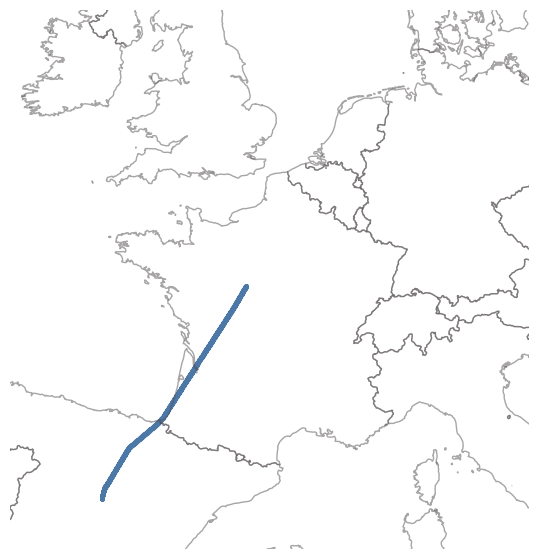

In [3]:
with plt.style.context("traffic"):
    fig, ax = plt.subplots(subplot_kw=dict(projection=EuroPP()))
    ax.add_feature(countries())
    ax.set_extent((-7, 13, 40, 55))
    ax.spines["geo"].set_visible(False)
    fl_data['34134e'].data.plot.scatter(ax=ax,
        x="longitude",
        y="latitude",
        transform=PlateCarree(),
        s=5,
        cmap="viridis")

Now the question is how to overlay a weather radar image on this plot. I guess we have to use longitude + latitude.